In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [10]:

# Load the dataset
df = pd.read_csv('bank+marketing/bank/bank-full.csv', sep=';')

In [11]:

## 3. Dataset Summary

# Number of Rows and Columns
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("\\n" + "="*40 + "\\n")

# Data Types
print("Data types of each column:")
df.info()
print("\\n" + "="*40 + "\\n")

# Small Sample Table
print("Top 5 rows of the dataset:")
df.head()

The dataset has 45211 rows and 17 columns.
\n========================================\n
Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:

## 4. Basic Statistics

print("="*50)
print("          DETAILED NUMERICAL STATISTICS")
print("="*50 + "\\n")


# Select only the columns with numerical data
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    # Calculations
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0] # The first mode if there are multiple
    min_val = df[col].min()
    max_val = df[col].max()
    range_val = max_val - min_val
    std_val = df[col].std()
    
    # Printing the results
    print(f"----- Statistics for '{col}' -----")
    print(f"  - Mean              : {mean_val:.2f}")
    print(f"  - Median            : {median_val:.2f}")
    print(f"  - Mode              : {mode_val}")
    print(f"  - Minimum           : {min_val}")
    print(f"  - Maximum           : {max_val}")
    print(f"  - Range             : {range_val}")
    print(f"  - Standard Deviation: {std_val:.2f}\\n")


# We can also display the mode for categorical columns
print("="*50)
print("          MODE FOR ALL COLUMNS (incl. Categorical)")
print("="*50 + "\\n")
display(df.mode().iloc[0])

          DETAILED NUMERICAL STATISTICS
==================================================\n
----- Statistics for 'age' -----
  - Mean              : 40.94
  - Median            : 39.00
  - Mode              : 32
  - Minimum           : 18
  - Maximum           : 95
  - Range             : 77
  - Standard Deviation: 10.62\n
----- Statistics for 'balance' -----
  - Mean              : 1362.27
  - Median            : 448.00
  - Mode              : 0
  - Minimum           : -8019
  - Maximum           : 102127
  - Range             : 110146
  - Standard Deviation: 3044.77\n
----- Statistics for 'day' -----
  - Mean              : 15.81
  - Median            : 16.00
  - Mode              : 20
  - Minimum           : 1
  - Maximum           : 31
  - Range             : 30
  - Standard Deviation: 8.32\n
----- Statistics for 'duration' -----
  - Mean              : 258.16
  - Median            : 180.00
  - Mode              : 124
  - Minimum           : 0
  - Maximum           : 4918
  - Rang

age                   32
job          blue-collar
marital          married
education      secondary
default               no
balance                0
housing              yes
loan                  no
contact         cellular
day                   20
month                may
duration             124
campaign               1
pdays                 -1
previous               0
poutcome         unknown
y                     no
Name: 0, dtype: object

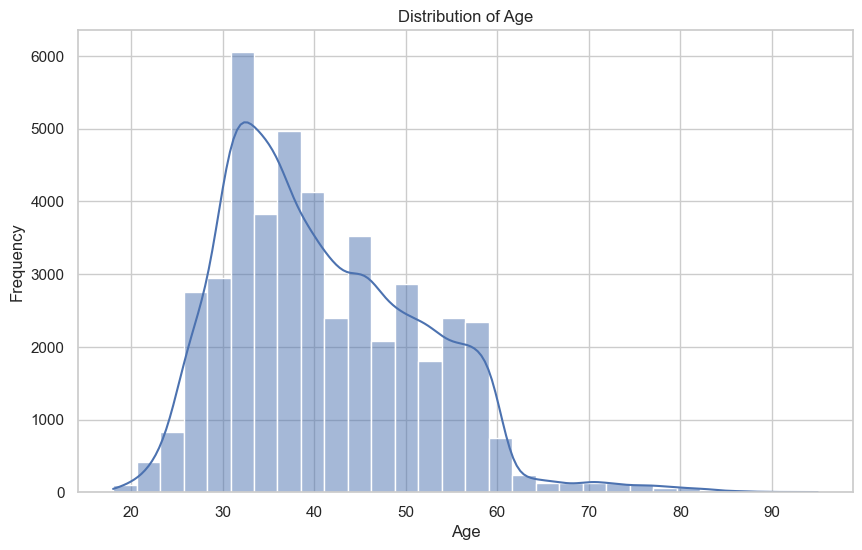

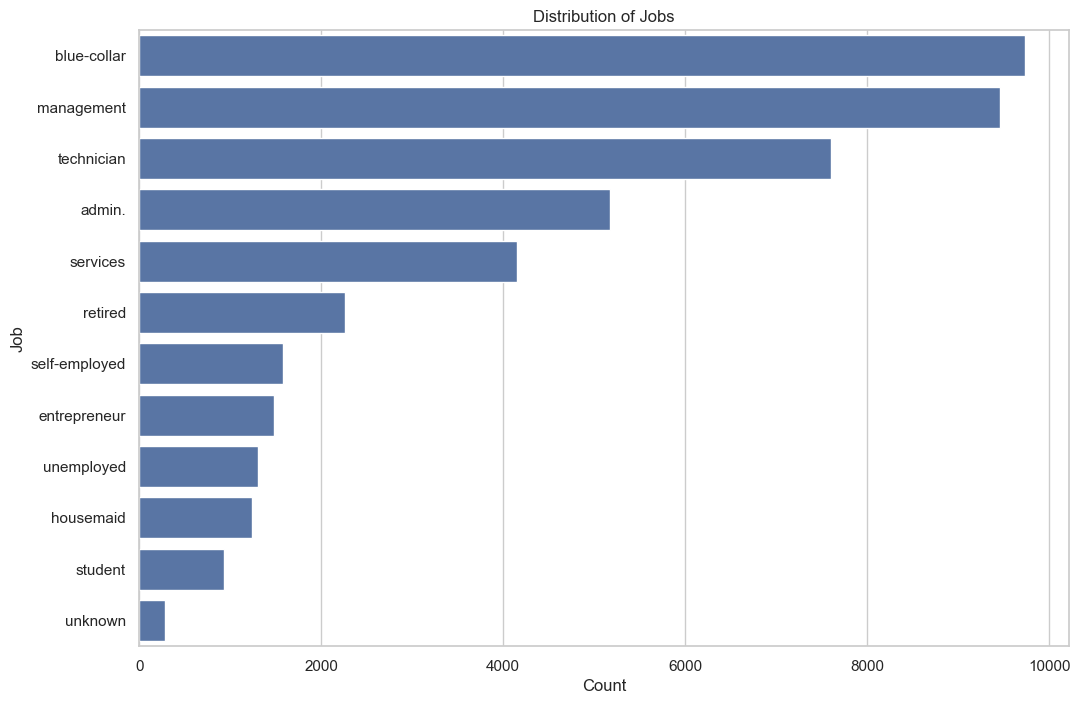

In [13]:

## 5. Simple Visuals

# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar Chart of Job Distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='job', data=df, order = df['job'].value_counts().index)
plt.title('Distribution of Jobs')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

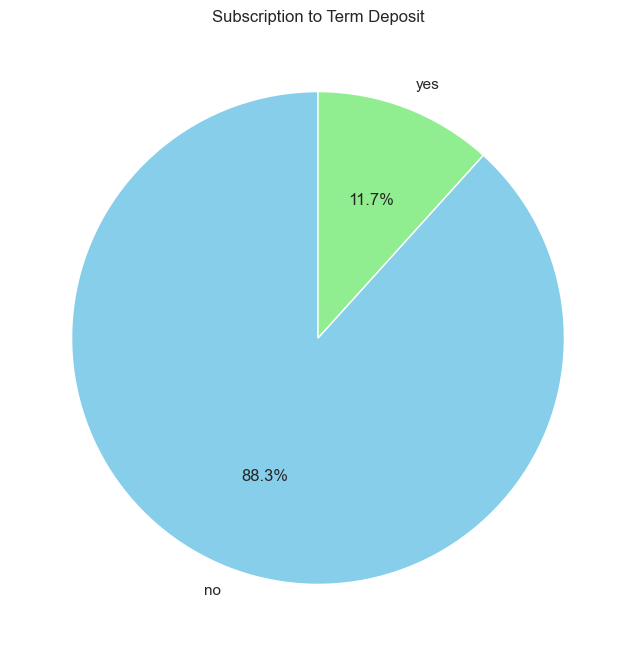

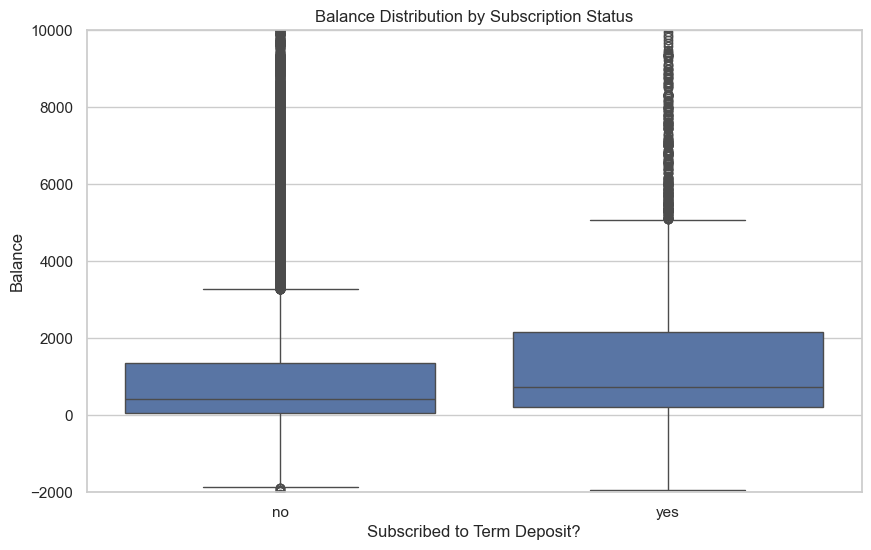

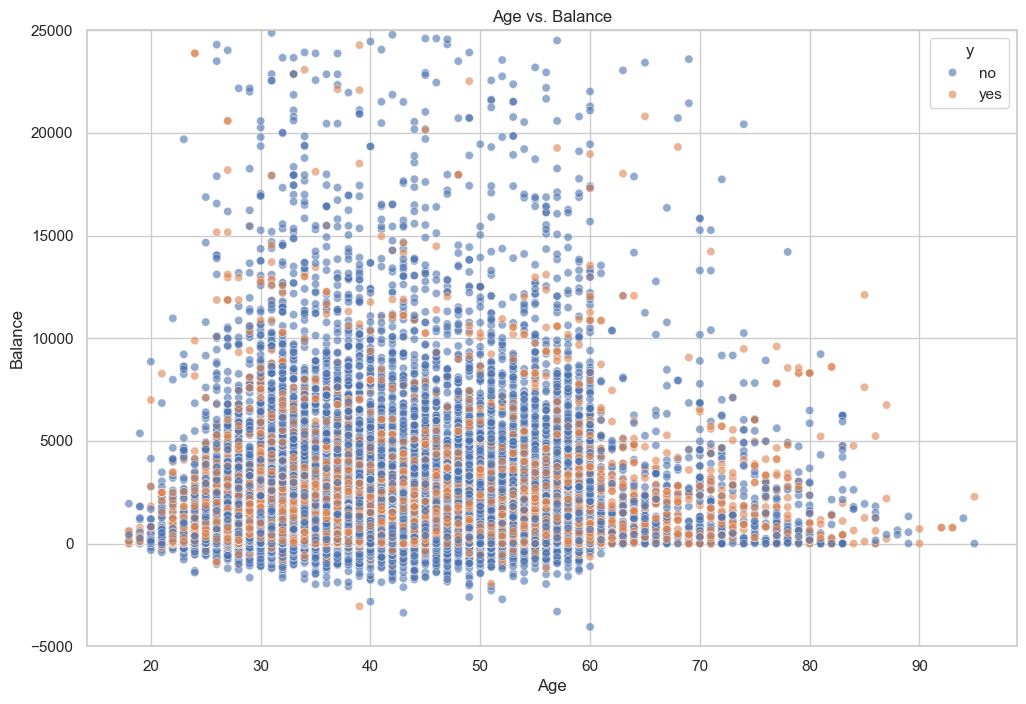

In [14]:

# Pie Chart of Subscription Status
plt.figure(figsize=(8, 8))
df['y'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Subscription to Term Deposit')
plt.ylabel('')  # Hide the y-label
plt.show()

# Boxplot of Balance by Subscription Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=df)
plt.title('Balance Distribution by Subscription Status')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Balance')
# Limiting y-axis to see the boxplot distribution better, as there are outliers
plt.ylim(-2000, 10000)
plt.show()

# Scatter Plot of Age vs. Balance
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='balance', hue='y', data=df, alpha=0.6)
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
# Adjusting for better visualization
plt.ylim(-5000, 25000)
plt.show()